In [85]:
import pandas as pd
import black

# Wczytanie danych z pliku
data = pd.read_csv('msidseasonstats.csv', delimiter=';')

#Przygotowywanie danych
numeric_cols = data.columns[1:]
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric)
formatted_data = data[::-1] 
formatted_data.set_index('Season', inplace=True)  


print(formatted_data.to_string(index=True, header=True, float_format='%.1f'))

          FG   3P   FT  TRB  AST  STL  BLK  TOV   PF   PTS
Season                                                    
1990-91 41.4  2.3 21.3 43.3 24.7  8.6  5.3 16.0 23.2 106.3
1991-92 41.3  2.5 20.2 43.7 24.5  8.6  5.5 15.6 22.2 105.3
1992-93 40.7  3.0 20.9 43.1 24.7  8.6  5.2 15.9 23.2 105.3
1993-94 39.3  3.3 19.6 43.0 24.4  8.9  5.2 16.0 22.2 101.5
1994-95 38.0  5.5 19.9 41.6 23.4  8.3  5.2 15.9 23.5 101.4
1995-96 37.0  5.9 19.5 41.3 22.7  8.0  5.1 15.8 23.0  99.5
1996-97 36.1  6.0 18.7 41.1 22.0  8.2  4.9 15.7 22.1  96.9
1997-98 35.9  4.4 19.4 41.5 22.0  8.4  5.1 15.5 22.4  95.6
1998-99 34.2  4.5 18.8 41.7 20.7  8.4  5.0 15.3 22.2  91.6
1999-00 36.8  4.8 19.0 42.9 22.3  7.9  5.2 15.5 23.3  97.5
2000-01 35.7  4.8 18.6 42.5 21.8  7.8  5.3 15.0 22.3  94.8
2001-02 36.2  5.2 17.9 42.4 21.9  7.8  5.2 14.5 21.2  95.5
2002-03 35.7  5.1 18.5 42.3 21.5  7.9  5.0 14.9 21.8  95.1
2003-04 35.0  5.2 18.2 42.2 21.3  7.9  5.1 15.0 21.4  93.4
2004-05 35.9  5.6 19.7 41.9 21.3  7.5  4.9 14.5 22.6  97

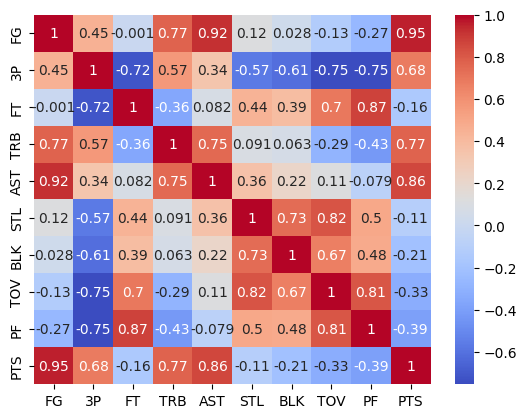

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tworzenie mapy korelacji
correlation_matrix = formatted_data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.savefig(f'mapa_korelacji.png', bbox_inches='tight')
plt.show()

In [87]:
import matplotlib.pyplot as plt

#generowanie wykresu słupkowego
def create_bar(stat):
    formatted_data[stat].plot(kind='bar', figsize=(8, 5))

    plt.xlabel("Sezon", fontsize=12)
    plt.ylabel(f'{stat}', fontsize=12)

    plt.savefig(f'wykres_{stat}.png', bbox_inches='tight')
    
    plt.show()


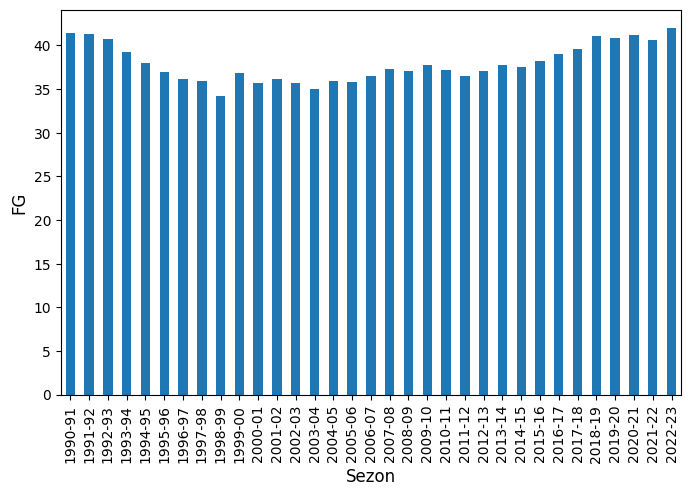

In [88]:
create_bar('FG')

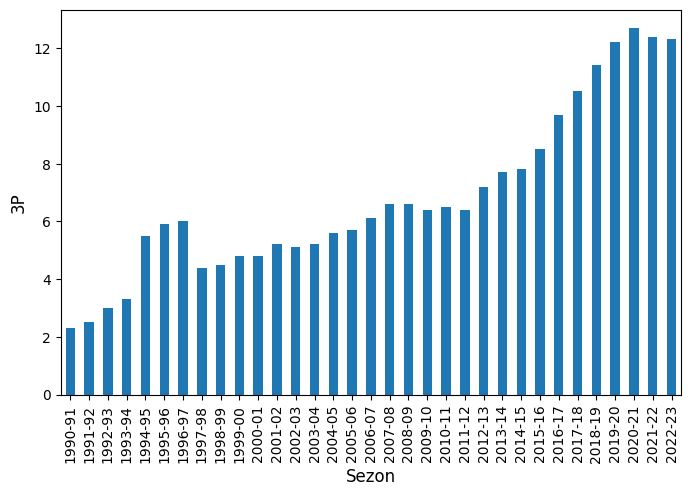

In [89]:
create_bar('3P')

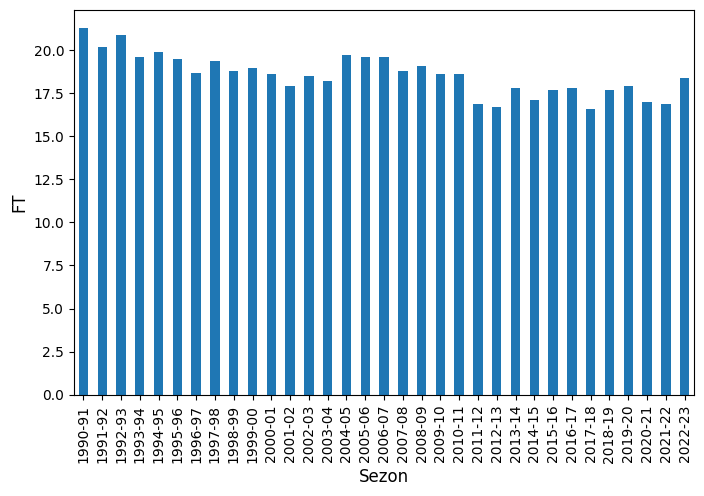

In [90]:
create_bar('FT')

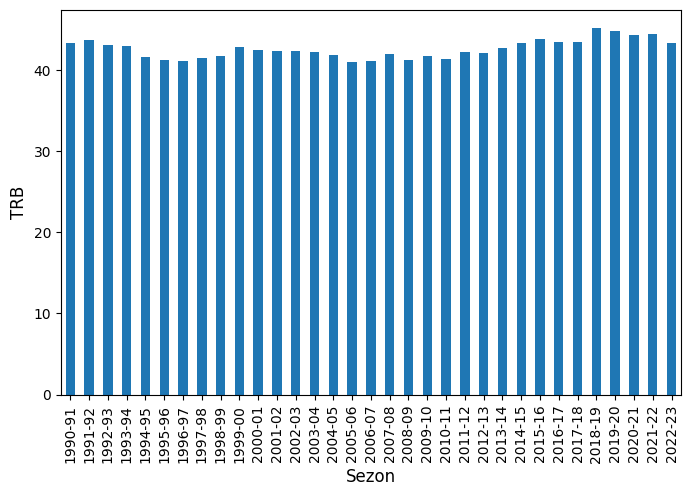

In [91]:
create_bar('TRB')

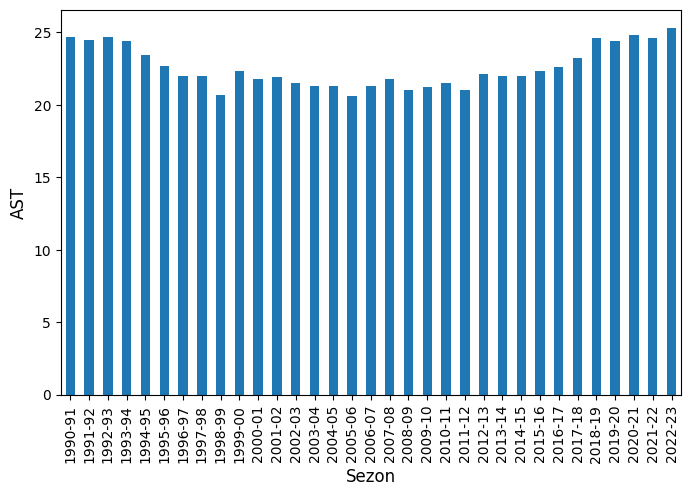

In [92]:
create_bar('AST')

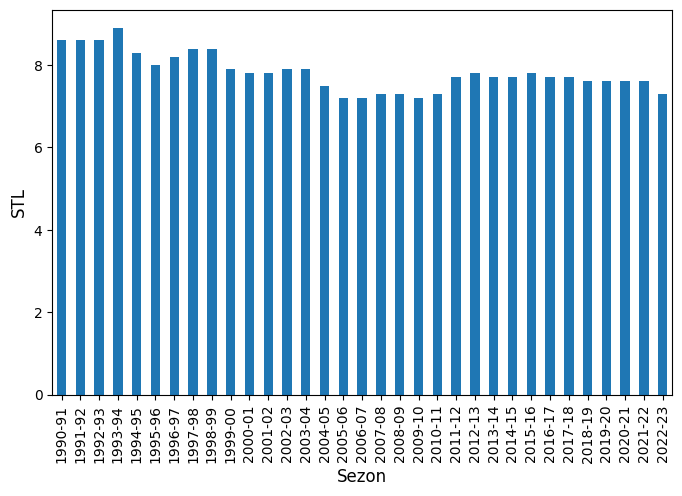

In [93]:
create_bar('STL')

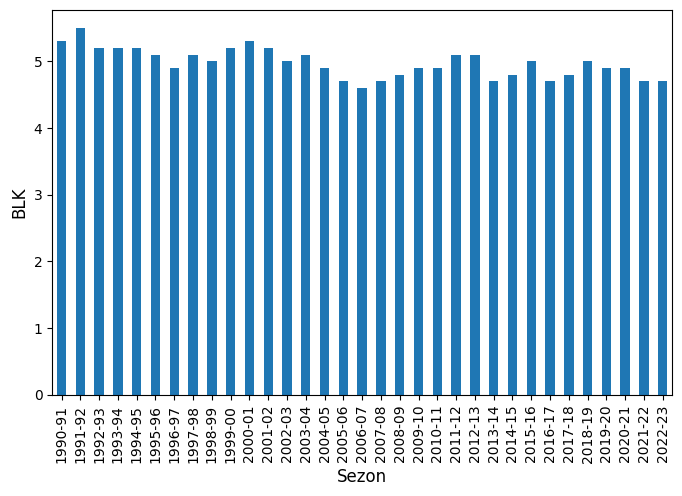

In [94]:
create_bar('BLK')

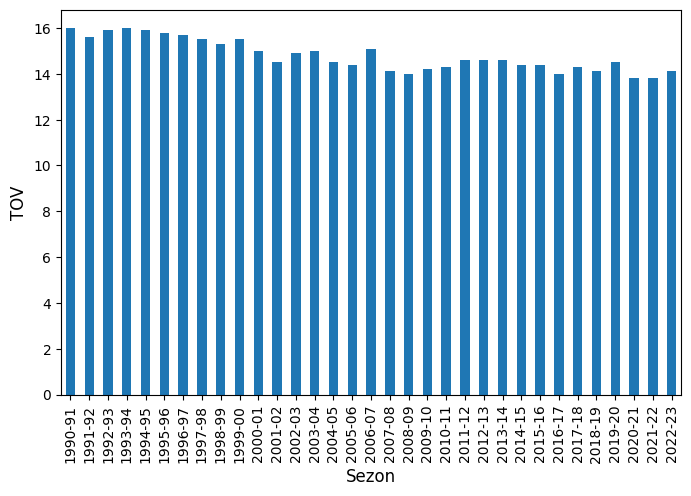

In [95]:
create_bar('TOV')

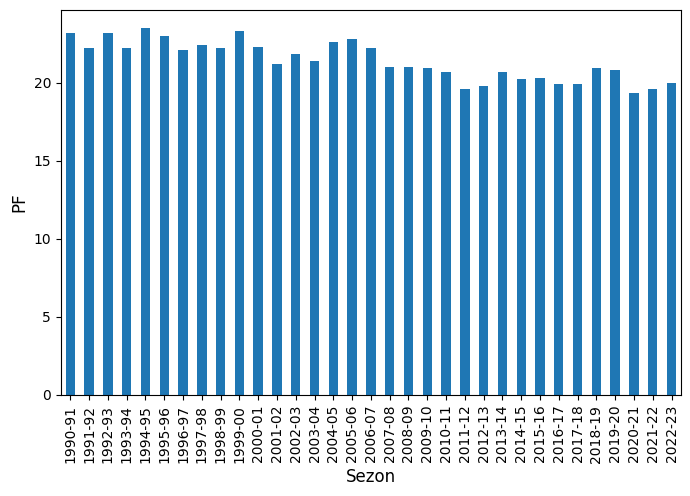

In [96]:
create_bar('PF')

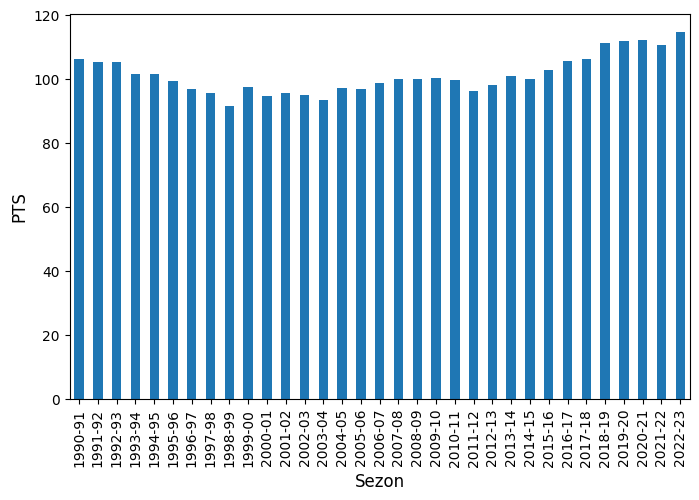

In [97]:
create_bar('PTS')

In [98]:
import urllib.request
import os
from typing import Tuple
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Odczytywanie danych
def read_data_vectors(statX, statY):

    X = formatted_data[statX].values
    Y = formatted_data[statY].values

    return X, Y


In [99]:
#Wyświtlanie wielomianu
def print_polynomial(theta, precission = 3):

    func_str = "y = "

    for i, c in enumerate(theta.ravel()):
        func_str += f"{round(c, precission)}*x^{i} + "
    return func_str[:-3]

In [100]:
#Obliczanie theta
def least_squares_solution(X, Y, polynomial_degree):
    
    
    Xm = np.array([np.ones(len(X))])

    for i in range(polynomial_degree):
        Xt = X**(i+1)

        Xm = np.row_stack((Xm, Xt))

    _T = np.array([np.linalg.inv(Xm.dot(Xm.T)).dot(Xm).dot(Y.T)])

    return _T.T

In [101]:
#Obliczanie wartości fukcji
def generalised_linear_model(X, T):
    
    return sum([coeff * X ** degree for degree, coeff in enumerate(T)])

In [102]:
#Wyświetlanie modelu wraz z regresją
def visualise_LSS_method(X, Y, T, statX, statY):
    
    X_test = np.linspace(start=X.min(), stop=X.max(), num=300)
    Y_pred = generalised_linear_model(X_test, T)
    plt.scatter(X, Y, color="tab:blue", label="dane rzeczywiste")
    plt.plot(X_test, Y_pred, color="tab:orange", label="estymowany trend")
    plt.xlabel(f'{statX}', fontsize=14)
    plt.ylabel(f'{statY}', fontsize=14)
    plt.legend()
    plt.savefig(f'wykres_zaleznosci_{statY}_od_{statX}.png', bbox_inches='tight')
    plt.show()

In [103]:
#obliczanie trendu i wyświetlanie wykresu go przedstawiającego
def analyze_correlation(Xstat, Ystat, precision):
    X, Y = read_data_vectors(Xstat, Ystat)
    T = least_squares_solution(X, Y, precision)
    print(print_polynomial(T))
    visualise_LSS_method(X, Y, T, Xstat, Ystat)


y = -24.542*x^0 + 1.466*x^1


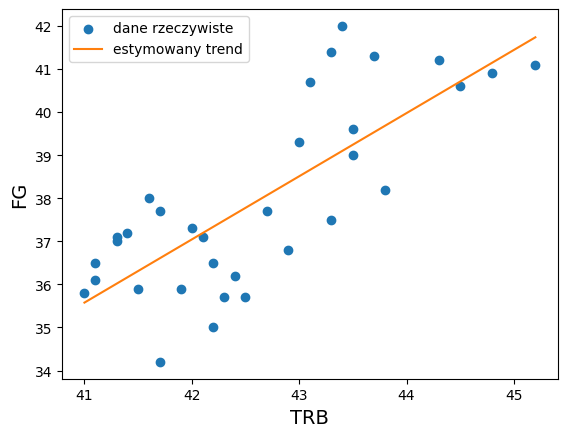

In [104]:
analyze_correlation('TRB', 'FG', 1)

y = -0.56*x^0 + 0.61*x^1


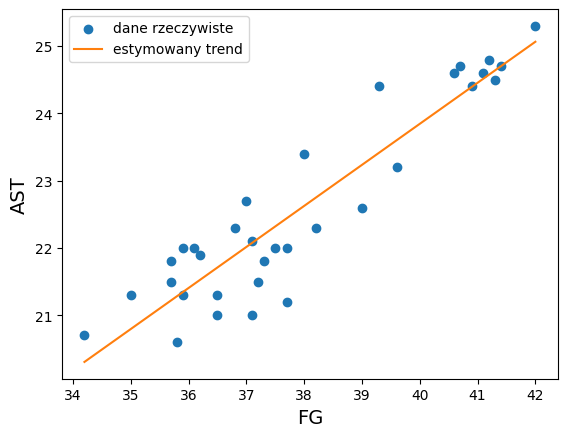

In [105]:
analyze_correlation('FG', 'AST', 1)

y = 2.761*x^0 + 2.597*x^1


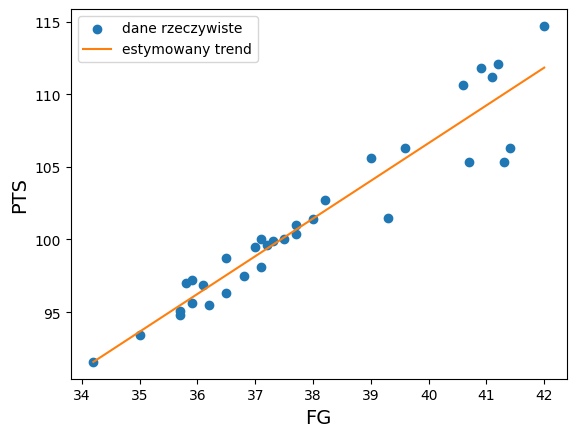

In [106]:
analyze_correlation('FG', 'PTS', 1)

y = 111.803*x^0 + -4.628*x^1 + 0.384*x^2


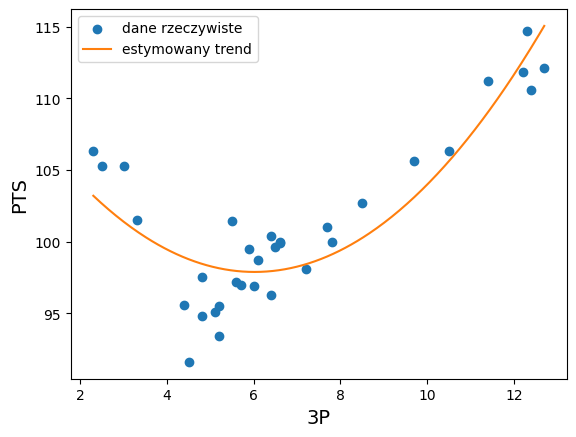

In [107]:
analyze_correlation('3P', 'PTS', 2)

y = 1.05*x^0 + 1.184*x^1


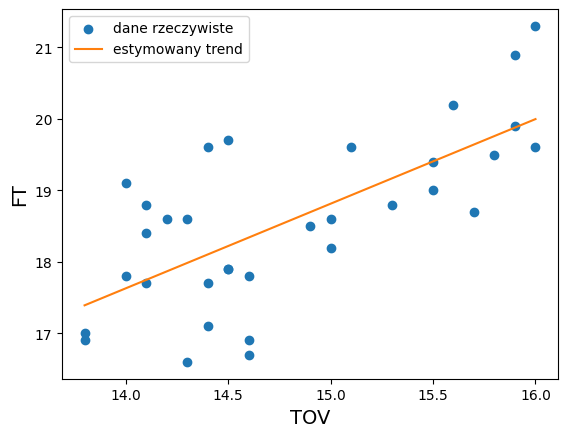

In [108]:
analyze_correlation('TOV', 'FT', 1)

y = 0.856*x^0 + 0.828*x^1


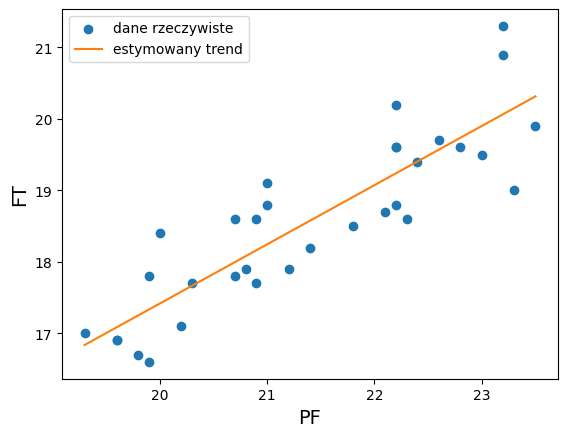

In [109]:
analyze_correlation('PF', 'FT', 1)

y = -17.516*x^0 + 0.941*x^1


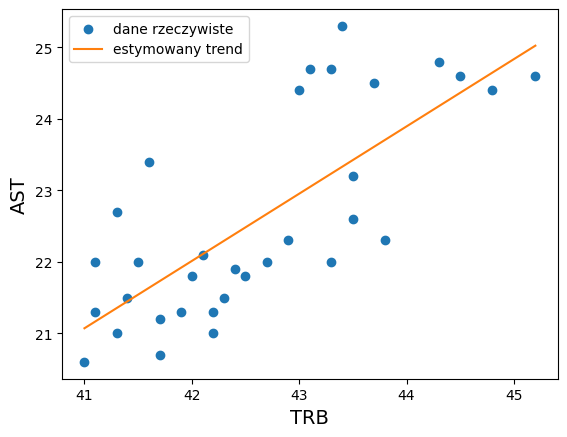

In [110]:
analyze_correlation('TRB', 'AST', 1)

y = -68.947*x^0 + 3.995*x^1


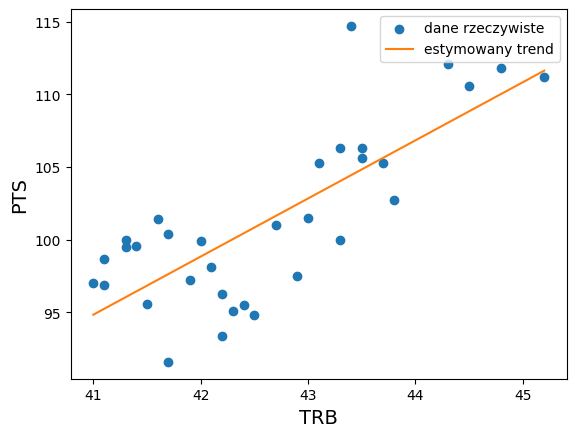

In [111]:
analyze_correlation('TRB', 'PTS', 1)

y = 21.469*x^0 + 3.534*x^1


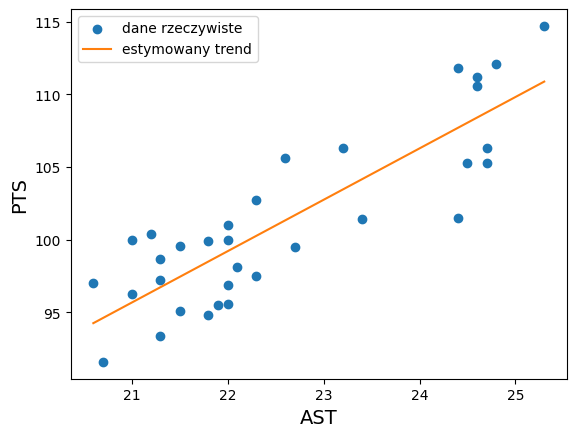

In [112]:
analyze_correlation('AST', 'PTS', 1)

y = -0.128*x^0 + 0.537*x^1


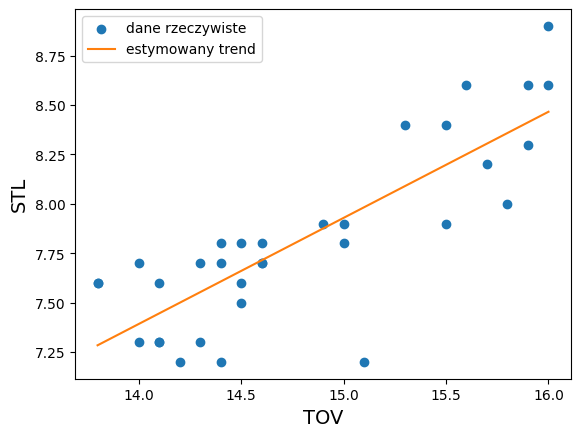

In [113]:
analyze_correlation('TOV', 'STL', 1)

y = 0.209*x^0 + 1.53*x^1


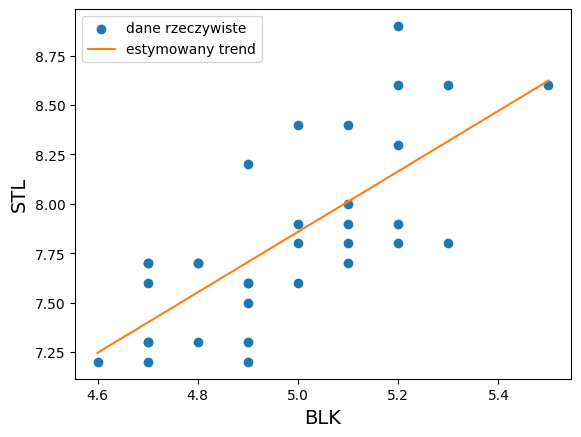

In [114]:
analyze_correlation('BLK', 'STL', 1)

y = 1.881*x^0 + 0.209*x^1


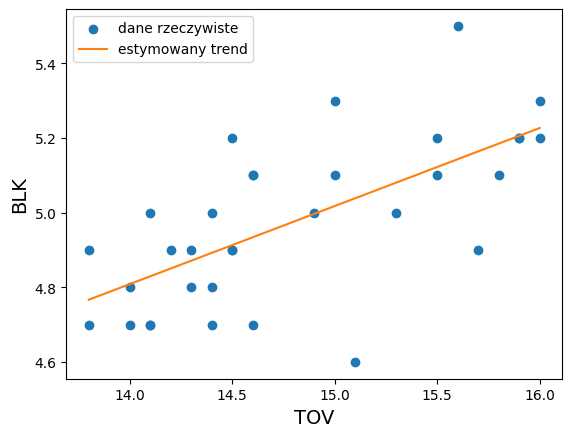

In [115]:
analyze_correlation('TOV', 'BLK', 1)

y = -0.043*x^0 + 1.449*x^1


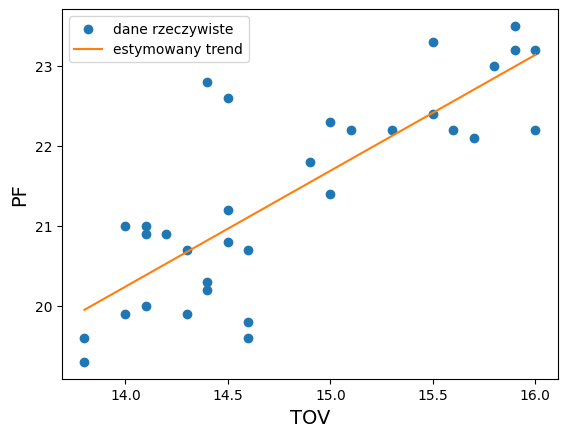

In [116]:
analyze_correlation('TOV', 'PF', 1)

y = 23.604*x^0 + -0.324*x^1


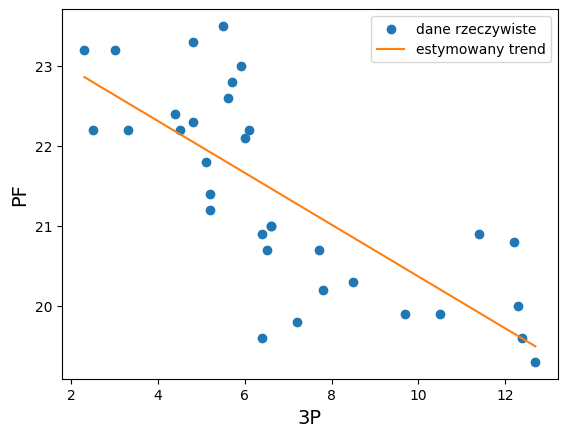

In [117]:
analyze_correlation('3P', 'PF', 1)

y = 16.029*x^0 + -0.18*x^1


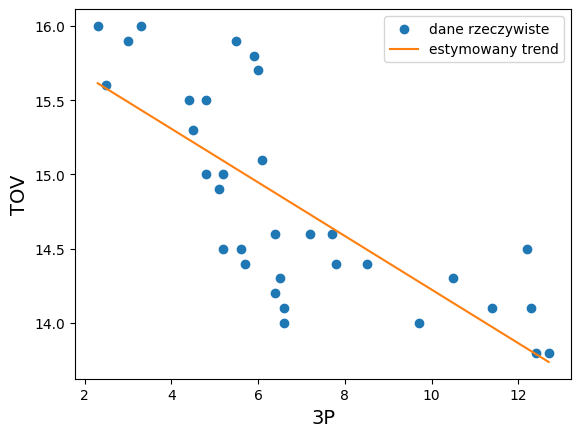

In [118]:
analyze_correlation('3P', 'TOV', 1)

y = 20.569*x^0 + -0.293*x^1


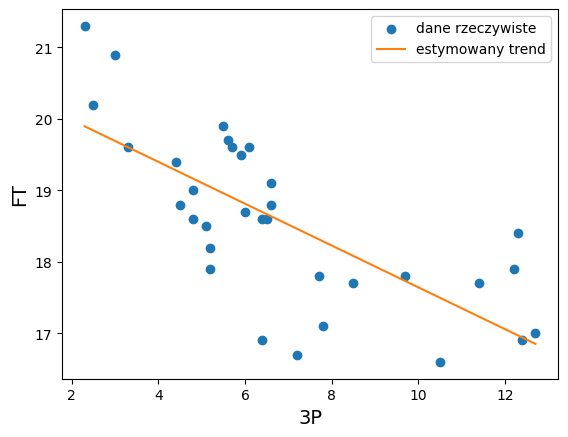

In [119]:
analyze_correlation('3P', 'FT', 1)

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.metrics import confusion_matrix


# Wczytanie danych
data = pd.read_csv('msidplayoffstats.csv', delimiter=';')

# Oddzielanie cechy od klasy którą chcemy przewidzieć
X = data.drop('Playoffs', axis=1)
y = data['Playoffs']

# Train-test split - tylko do testowania modelu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Podział na cechy numeryczne i kategoryczne
categorical_features = ['Season']
numerical_features = ['FG', '3P', 'FT', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']





In [121]:
#Zliczanie częstotliwości występowanie danej klasy
def count_yes_no(data):
    yes=0
    no=0

    for single_data in data:
        if single_data=='YES': 
            yes+=1
        else:
            no+=1

    print(f'yes: {yes}')
    print(f'no: {no}')


In [122]:
count_yes_no(y)

yes: 532
no: 434


In [123]:
# Numerical features 
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical values
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  
])


# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [124]:
from sklearn.neighbors import KNeighborsClassifier

#model KNN

clf1_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=14, metric='cosine'))  
])

clf1_knn.fit(X_train, y_train)

y_pred = clf1_knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Model accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Model accuracy: 0.74
              precision    recall  f1-score   support

          NO       0.69      0.71      0.70        83
         YES       0.78      0.76      0.77       111

    accuracy                           0.74       194
   macro avg       0.73      0.73      0.73       194
weighted avg       0.74      0.74      0.74       194

Confusion Matrix:
[[59 24]
 [27 84]]


In [125]:
from sklearn import svm

# model SVC

clf1_svm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', svm.SVC(kernel='rbf'))  
])

clf1_svm.fit(X_train, y_train)

y_pred = clf1_svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Model accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Model accuracy: 0.76
              precision    recall  f1-score   support

          NO       0.76      0.63      0.69        83
         YES       0.75      0.86      0.80       111

    accuracy                           0.76       194
   macro avg       0.76      0.74      0.75       194
weighted avg       0.76      0.76      0.75       194

Confusion Matrix:
[[52 31]
 [16 95]]


In [126]:
from sklearn.tree import DecisionTreeClassifier

#model DecisionTree

clf1_tree = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())  
])

clf1_tree.fit(X_train, y_train)

y_pred = clf1_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Model accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

#ważność cech

feature_importances = clf1_tree['classifier'].feature_importances_
feature_names = clf1_tree.named_steps['preprocessor'].get_feature_names_out()

for i in range(len(feature_names)):
    feature_names[i]=feature_names[i][5:]

for feature, importance in zip(feature_names, feature_importances):
    print(f"Ważność cechy {feature}: {round(importance, 4)}")
  

Model accuracy: 0.69
              precision    recall  f1-score   support

          NO       0.63      0.64      0.63        83
         YES       0.73      0.72      0.72       111

    accuracy                           0.69       194
   macro avg       0.68      0.68      0.68       194
weighted avg       0.69      0.69      0.69       194

Confusion Matrix:
[[53 30]
 [31 80]]
Ważność cechy FG: 0.0754
Ważność cechy 3P: 0.044
Ważność cechy FT: 0.1202
Ważność cechy TRB: 0.1071
Ważność cechy AST: 0.0959
Ważność cechy STL: 0.0902
Ważność cechy BLK: 0.0994
Ważność cechy TOV: 0.1588
Ważność cechy PF: 0.109
Ważność cechy PTS: 0.016
Ważność cechy Season_1990-91: 0.0
Ważność cechy Season_1991-92: 0.0
Ważność cechy Season_1992-93: 0.0
Ważność cechy Season_1993-94: 0.0
Ważność cechy Season_1994-95: 0.0013
Ważność cechy Season_1995-96: 0.0046
Ważność cechy Season_1996-97: 0.0
Ważność cechy Season_1997-98: 0.0035
Ważność cechy Season_1998-99: 0.0084
Ważność cechy Season_1999-00: 0.0048
Ważność

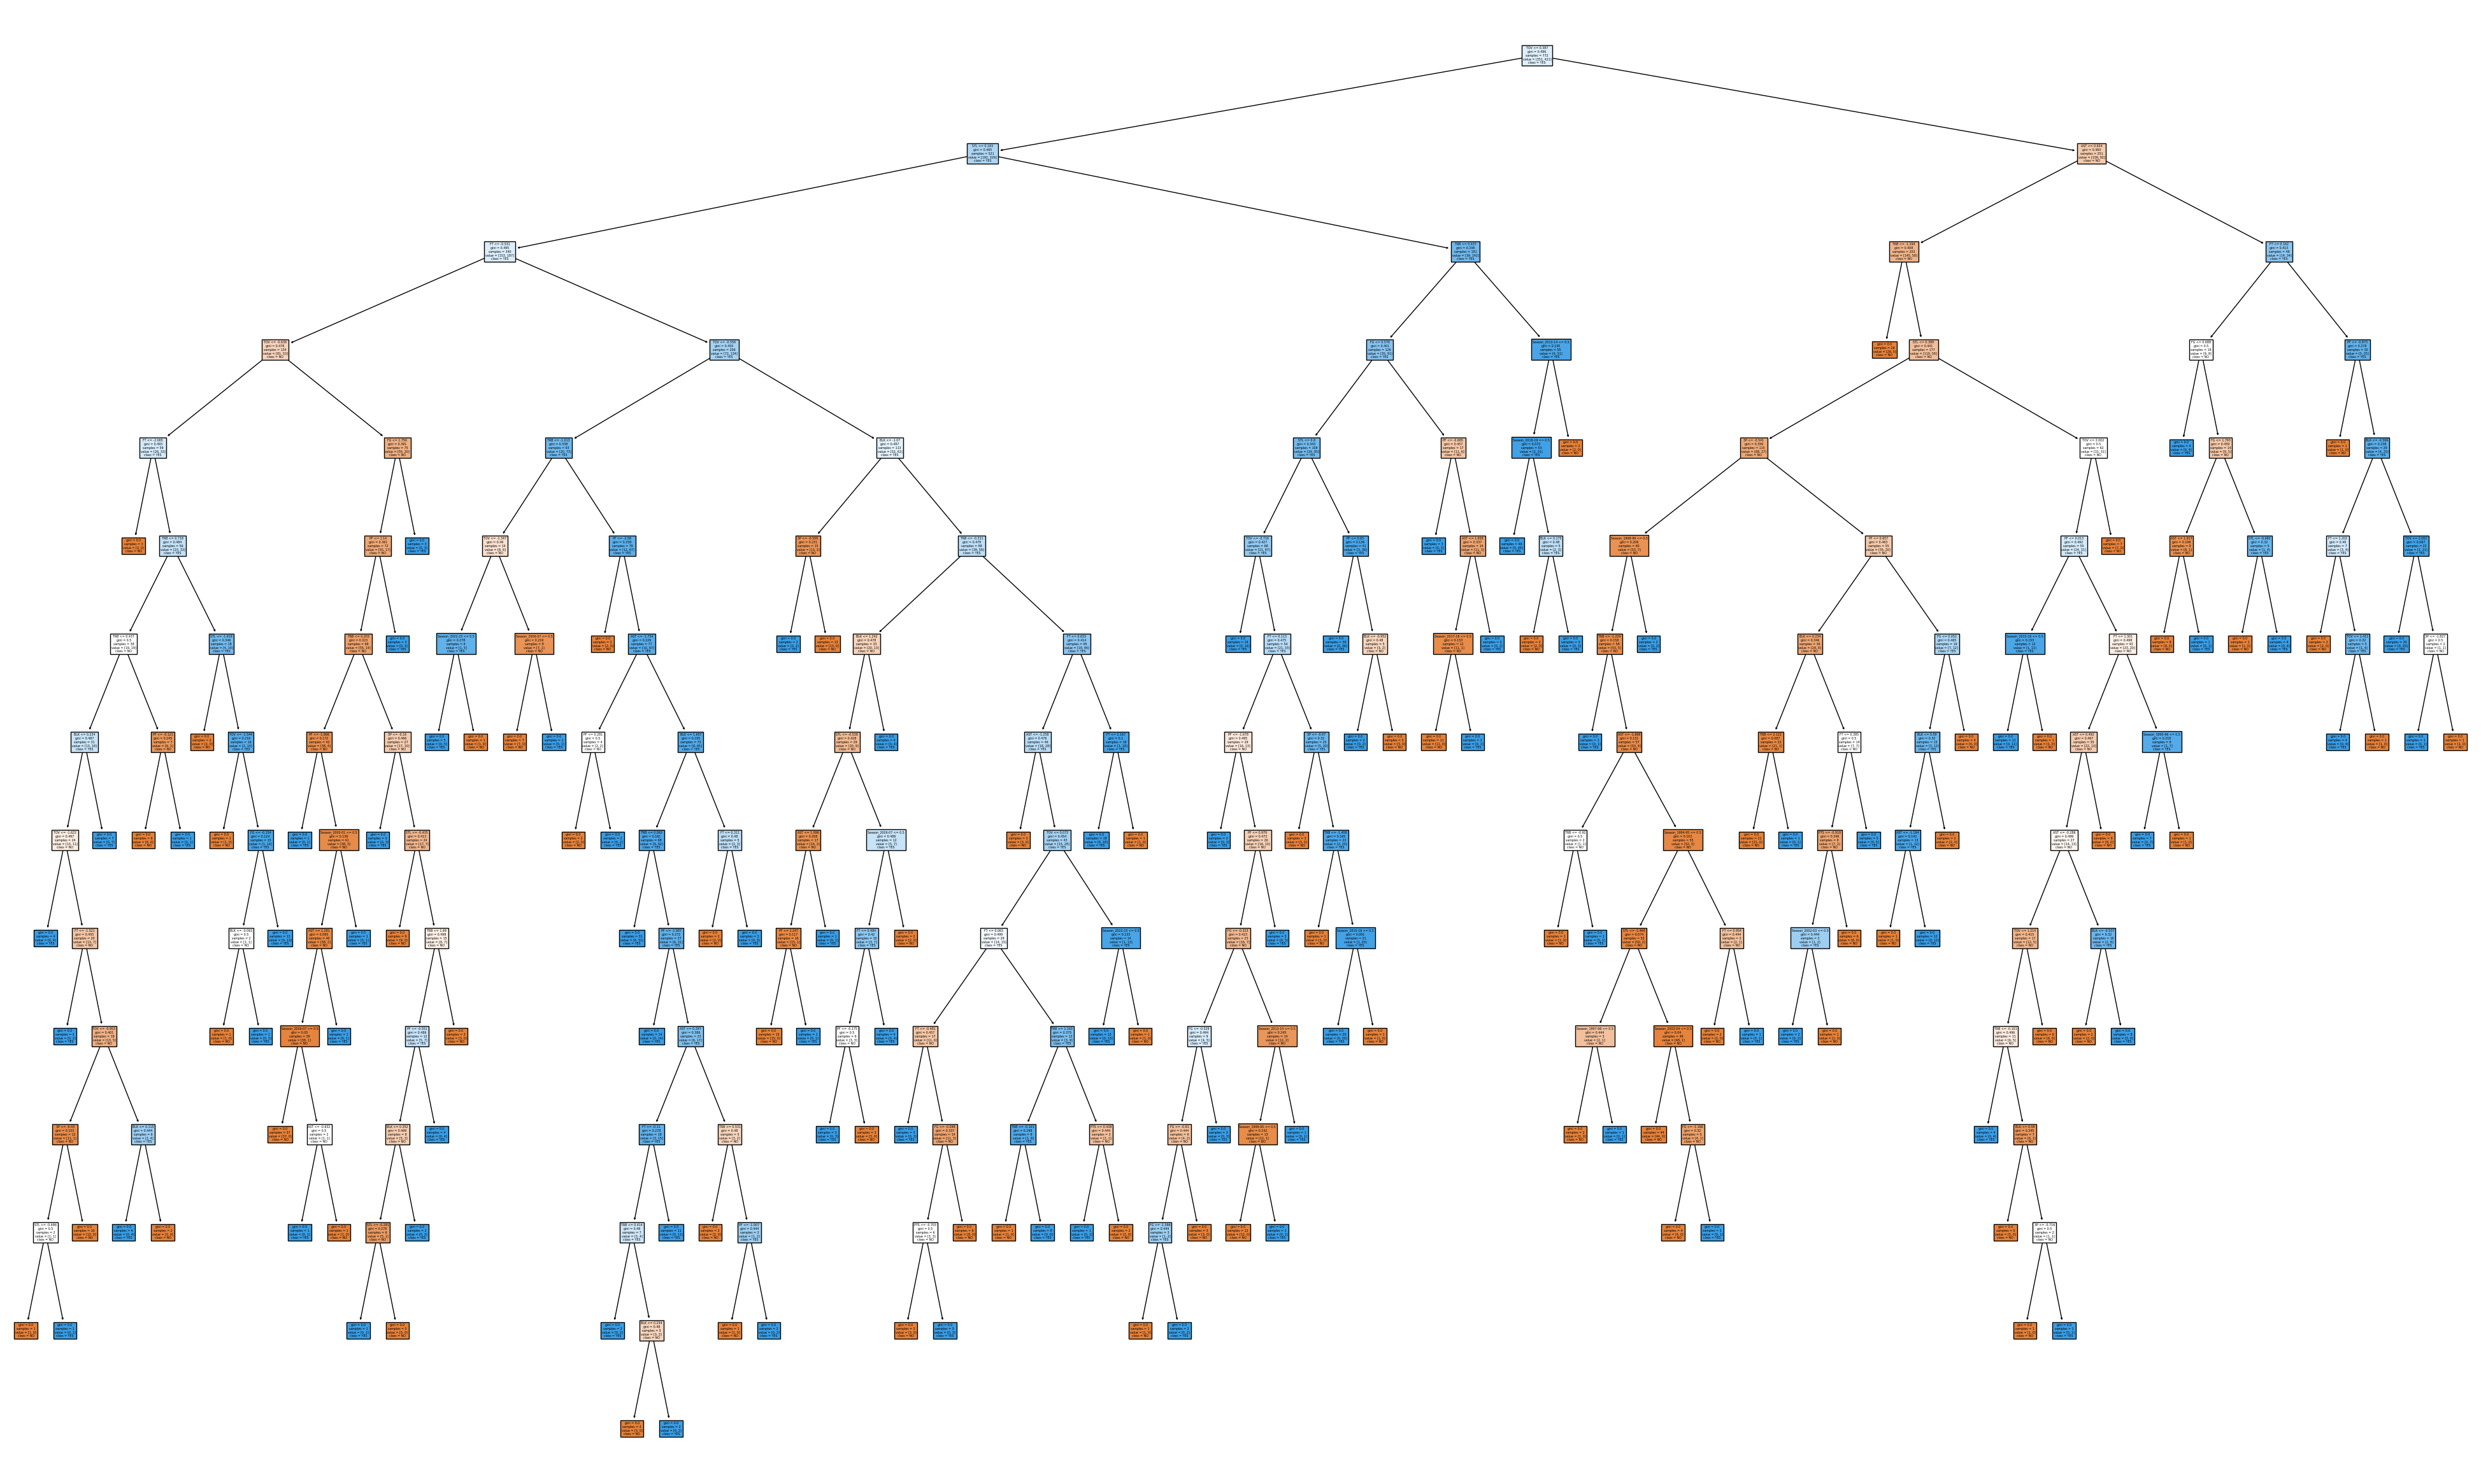

In [127]:
import matplotlib.pyplot as plt
from sklearn import tree

#wyświerlanie DecisionTree

class_names=clf1_tree['classifier'].classes_
fig = plt.figure(figsize=(50,30))
_ = tree.plot_tree(clf1_tree['classifier'], feature_names=feature_names, class_names=class_names, filled=True)

In [128]:
# Filtrowanie danych po sezonie

def filter_by_season(data, season):
    filtered_data = data.loc[data['Season'] == season].copy()
    return filtered_data

In [129]:
# Zmiana sezonu w danych

def change_season_value(data, new_season):
    data['Season'] = new_season
    return data

In [130]:
# Sprawdzenie jak drużyny z konkretnego sezonu poradziłyby sobie w innym

def check_playoffs_in_season(data, season, new_season):
    data = filter_by_season(data, season)
    
    X_test2 = change_season_value(data, new_season)

    y_pred2 = clf1_tree.predict(X_test2)
    
    print(new_season)
    count_yes_no(y_pred2)
    

In [131]:
#przygotowanie danych
data2 = pd.read_csv('msidplayoffstats.csv', delimiter=';')


X_test2 = data2.drop('Playoffs', axis=1)

In [132]:
check_playoffs_in_season(X_test2, '2022-23', '2022-23')

2022-23
yes: 20
no: 10


In [133]:
check_playoffs_in_season(X_test2, '2022-23', '2017-18')

2017-18
yes: 22
no: 8


In [134]:
check_playoffs_in_season(X_test2, '2022-23', '2012-13')

2012-13
yes: 22
no: 8


In [135]:
check_playoffs_in_season(X_test2, '2022-23', '2007-08')

2007-08
yes: 22
no: 8


In [136]:
check_playoffs_in_season(X_test2, '2022-23', '2002-03')

2002-03
yes: 22
no: 8


In [137]:
check_playoffs_in_season(X_test2, '2022-23', '1997-98')

1997-98
yes: 22
no: 8


In [138]:
check_playoffs_in_season(X_test2, '2022-23', '1992-93')

1992-93
yes: 22
no: 8


In [139]:
check_playoffs_in_season(X_test2, '2022-23', '2022-23')

2022-23
yes: 20
no: 10


In [140]:
check_playoffs_in_season(X_test2, '2017-18', '2022-23')

2022-23
yes: 16
no: 14


In [141]:
check_playoffs_in_season(X_test2, '2012-13', '2022-23')

2022-23
yes: 13
no: 17


In [142]:
check_playoffs_in_season(X_test2, '2007-08', '2022-23')

2022-23
yes: 17
no: 13


In [143]:
check_playoffs_in_season(X_test2, '2002-03', '2022-23')

2022-23
yes: 16
no: 13


In [144]:
check_playoffs_in_season(X_test2, '1997-98', '2022-23')

2022-23
yes: 14
no: 15


In [145]:
check_playoffs_in_season(X_test2, '1992-93', '2022-23')

2022-23
yes: 15
no: 12
